#  Urban Waste Revolution: City-Wide Garbage Classification with Advanced CNNs :

pip install tensorflow
pip install keras

**Garbage Classification Project:**
Trained on 4000 images, the model accurately categorizes waste into classes such as Cardboard, Food Organics, Glass, Metal, Miscellaneous Trash, Paper, Plastic, Textile Trash, and Vegetation.

**Uses in Real World:**
1. *Efficient Recycling:* Automates sorting recyclable materials for improved recycling processes.
2. *Reduced Environmental Impact:* Encourages proper waste disposal, minimizing environmental harm.
3. *Streamlined Waste Handling:* Enhances waste management efficiency for cost-effective operations.
4. *Optimized Resource Allocation:* Identifies waste types accurately, optimizing resource usage.
5. *Community Sustainability:* Contributes to a cleaner environment, supporting community sustainability.

In [13]:
# Importing the Data :

from keras.preprocessing.image import ImageDataGenerator

train_data_gen = ImageDataGenerator(rescale=(1/225),shear_range=0.2,zoom_range=0.2)
train_data = train_data_gen.flow_from_directory("F:\\KAGGLE\\CNN WASTE CLASSIFICATION\\realwaste\\realwaste-main\\RealWaste\\train_data",
                                               target_size=(64,64),class_mode='categorical')

test_data_gen = ImageDataGenerator(rescale=(1/225),shear_range=0.2,zoom_range=0.2)
test_data = test_data_gen.flow_from_directory("F:\\KAGGLE\\CNN WASTE CLASSIFICATION\\realwaste\\realwaste-main\\RealWaste\\test_data",
                                              target_size=(64,64),class_mode="categorical")

Found 3902 images belonging to 9 classes.
Found 872 images belonging to 9 classes.


In [44]:
print("=========================================== Train Classes ==========================================")
print(train_data.class_indices)

print("=========================================== Test Classes ===========================================")
print(test_data.class_indices)

=========================================== Train Classes ==========================================
{'Cardboard': 0, 'Food Organics': 1, 'Glass': 2, 'Metal': 3, 'Miscellaneous Trash': 4, 'Paper': 5, 'Plastic': 6, 'Textile Trash': 7, 'Vegetation': 8}
=========================================== Test Classes ===========================================
{'Cardboard': 0, 'Food Organics': 1, 'Glass': 2, 'Metal': 3, 'Miscellaneous Trash': 4, 'Paper': 5, 'Plastic': 6, 'Textile Trash': 7, 'Vegetation': 8}


In [116]:
# Cretin the Neural Network :

from keras.models import Sequential
from keras.layers import Dense

from keras.layers import Conv2D
model = Sequential()
model.add(Conv2D(input_shape=[64,64,3],filters=50,kernel_size=(3,3),activation="relu"))

from keras.layers import MaxPool2D
model.add(MaxPool2D(pool_size=(2,2),strides=2))

from keras.layers import Flatten
model.add(Flatten())

In [117]:
from keras.layers import Dense
model.add(Dense(units=100,activation="relu"))
model.add(Dense(units=100,activation="relu"))
model.add(Dense(units=9,activation="softmax"))
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])
model.fit(x=train_data,validation_data=test_data,epochs=25)

Epoch 1/25
122/122 [==============================] - 163s 1s/step - loss: 1.8672 - accuracy: 0.3314 - val_loss: 2.1024 - val_accuracy: 0.2110
Epoch 2/25
122/122 [==============================] - 103s 842ms/step - loss: 1.4893 - accuracy: 0.4559 - val_loss: 1.6760 - val_accuracy: 0.4025
Epoch 3/25
122/122 [==============================] - 88s 722ms/step - loss: 1.3489 - accuracy: 0.5036 - val_loss: 1.5937 - val_accuracy: 0.4564
Epoch 4/25
122/122 [==============================] - 89s 727ms/step - loss: 1.2372 - accuracy: 0.5451 - val_loss: 1.6133 - val_accuracy: 0.4656
Epoch 5/25
122/122 [==============================] - 89s 727ms/step - loss: 1.1469 - accuracy: 0.5861 - val_loss: 1.5610 - val_accuracy: 0.4908
Epoch 6/25
122/122 [==============================] - 88s 724ms/step - loss: 1.0512 - accuracy: 0.6125 - val_loss: 1.7654 - val_accuracy: 0.4507
Epoch 7/25
122/122 [==============================] - 83s 683ms/step - loss: 0.9579 - accuracy: 0.6494 - val_loss: 1.5602 - val_acc

# Predictiog on New Data :

In [133]:
import numpy as np
from PIL import Image

1/1 [==============================] - 1s 989ms/step
[[1. 0. 0. 0. 0. 0. 0. 0. 0.]]


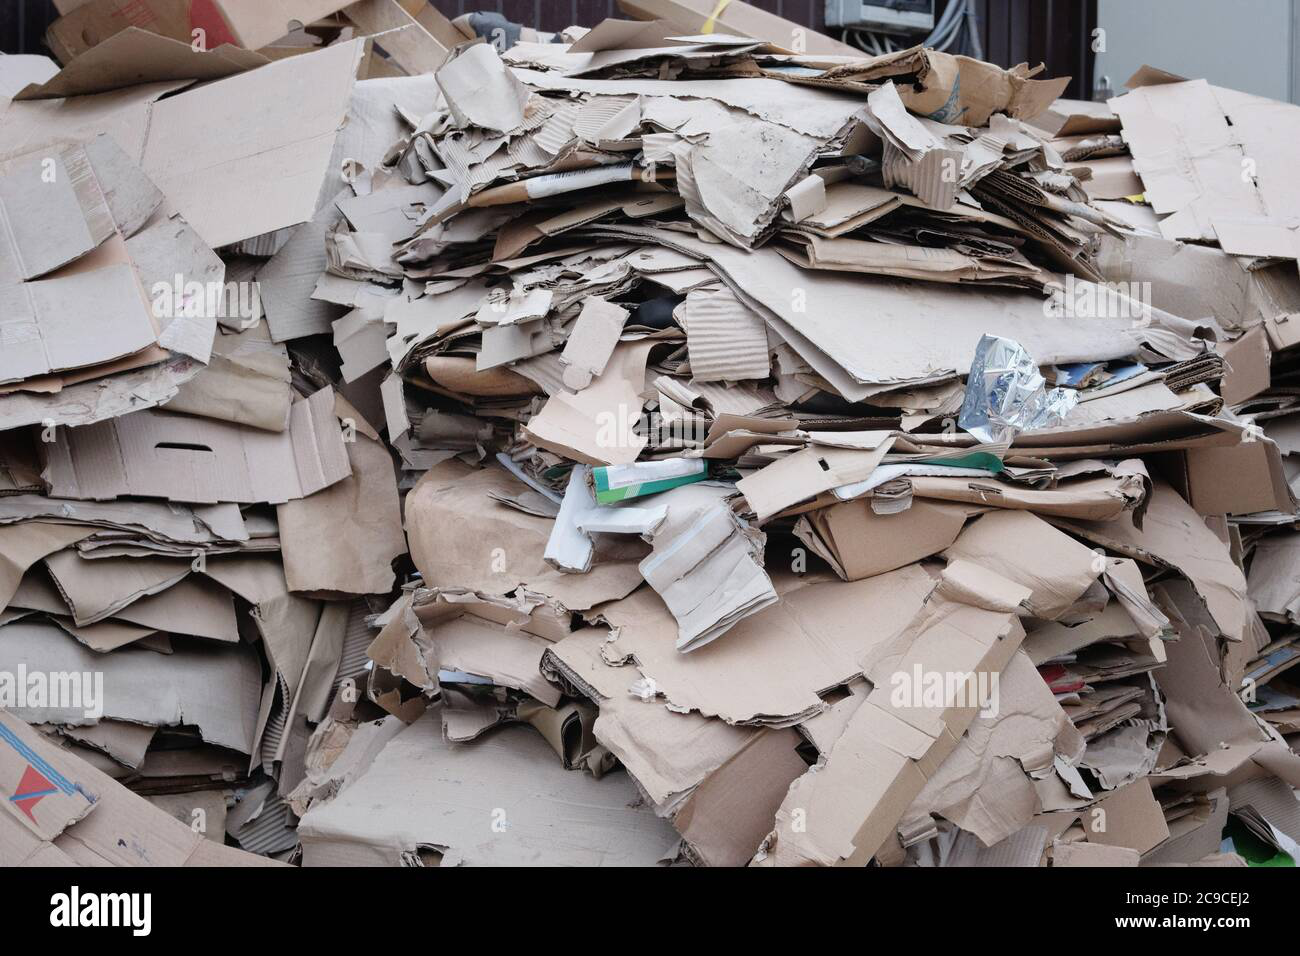

In [134]:
pred_img = Image.open("F:\\KAGGLE\\CNN WASTE CLASSIFICATION\\prediction\\pic14.jpg")
pred_img = pred_img.resize((64,64))
pred_img = np.array(pred_img)
pred_img = np.expand_dims(pred_img,axis=0)
result = model.predict(pred_img)
print(result)
Image.open("F:\\KAGGLE\\CNN WASTE CLASSIFICATION\\prediction\\pic14.jpg")

In [135]:
# Finding the class :

predicted_class_index = np.argmax(result)

class_labels = ['class1', 'class2', 'class3', 'class4', 'class5', 'class6',
                'class7', 'class8', 'class9']  # Replace with your actual class labels
predicted_class_label = class_labels[predicted_class_index]

print("Predicted Class:", predicted_class_label)

Predicted Class: class1


In [136]:
# Assuming predicted_class_label is the string obtained from the model prediction

if predicted_class_label == "class1":
    print("=========== Picture Contains Cardboard ==============")
elif predicted_class_label == "class2":
    print("=========== Picture Contains Food Organics ==============")
elif predicted_class_label == "class3":
    print("=========== Picture Contains Glass ==============")
elif predicted_class_label == "class4":
    print("=========== Picture Contains Metal ==============")
elif predicted_class_label == "class5":
    print("=========== Picture Contains Miscellaneous Trash ==============")
elif predicted_class_label == "class6":
    print("=========== Picture Contains Paper ==============")
elif predicted_class_label == "class7":
    print("=========== Picture Contains Plastic ==============")
elif predicted_class_label == "class8":
    print("=========== Picture Contains Textile Trash ==============")
elif predicted_class_label == "class9":
    print("=========== Picture Contains Vegetation ==============")


=========== Picture Contains Cardboard ==============


# Test 2 : 

1/1 [==============================] - 0s 32ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 1.]]


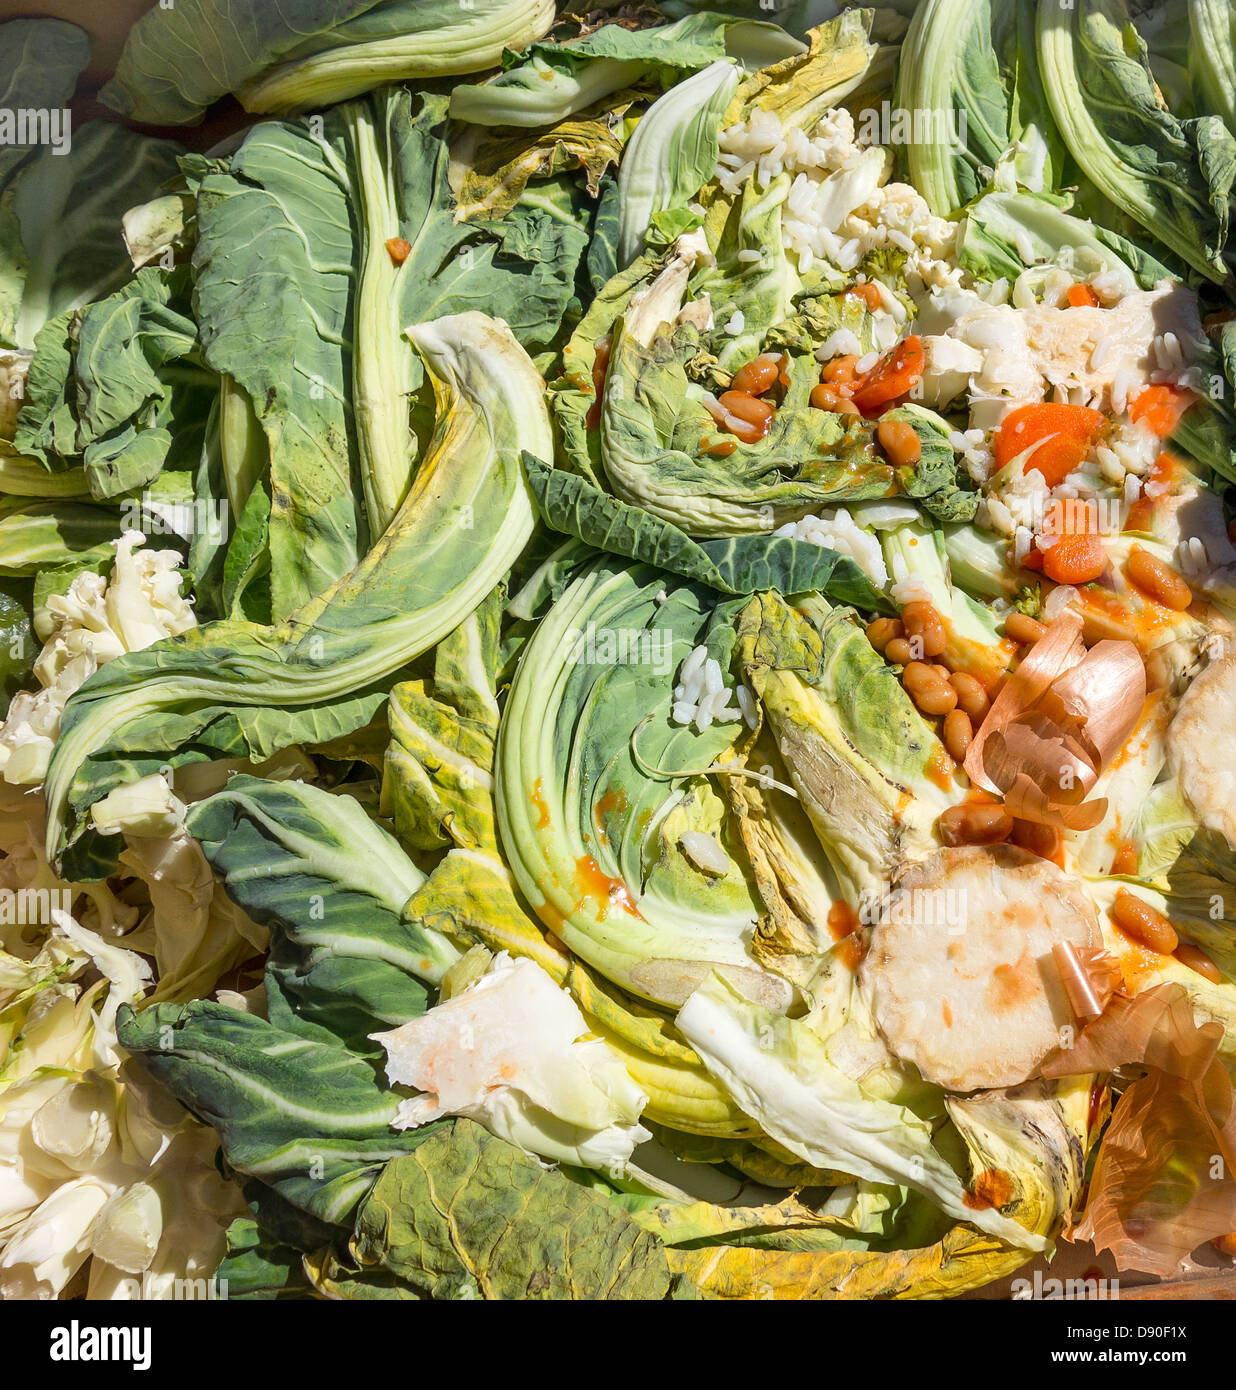

In [143]:
pred_img = Image.open("F:\\KAGGLE\\CNN WASTE CLASSIFICATION\\prediction\\pic2.jpg")
pred_img = pred_img.resize((64,64))
pred_img = np.array(pred_img)
pred_img = np.expand_dims(pred_img,axis=0)
result = model.predict(pred_img)
print(result)
Image.open("F:\\KAGGLE\\CNN WASTE CLASSIFICATION\\prediction\\pic2.jpg")

In [144]:
# Finding the class :

predicted_class_index = np.argmax(result)

class_labels = ['class1', 'class2', 'class3', 'class4', 'class5', 'class6',
                'class7', 'class8', 'class9']  # Replace with your actual class labels
predicted_class_label = class_labels[predicted_class_index]

print("Predicted Class:", predicted_class_label)

Predicted Class: class9


In [145]:
# Assuming predicted_class_label is the string obtained from the model prediction

if predicted_class_label == "class1":
    print("=========== Picture Contains Cardboard ==============")
elif predicted_class_label == "class2":
    print("=========== Picture Contains Food Organics ==============")
elif predicted_class_label == "class3":
    print("=========== Picture Contains Glass ==============")
elif predicted_class_label == "class4":
    print("=========== Picture Contains Metal ==============")
elif predicted_class_label == "class5":
    print("=========== Picture Contains Miscellaneous Trash ==============")
elif predicted_class_label == "class6":
    print("=========== Picture Contains Paper ==============")
elif predicted_class_label == "class7":
    print("=========== Picture Contains Plastic ==============")
elif predicted_class_label == "class8":
    print("=========== Picture Contains Textile Trash ==============")
elif predicted_class_label == "class9":
    print("=========== Picture Contains Vegetation ==============")


=========== Picture Contains Vegetation ==============


# Test 3 : 

1/1 [==============================] - 0s 47ms/step
[[1. 0. 0. 0. 0. 0. 0. 0. 0.]]


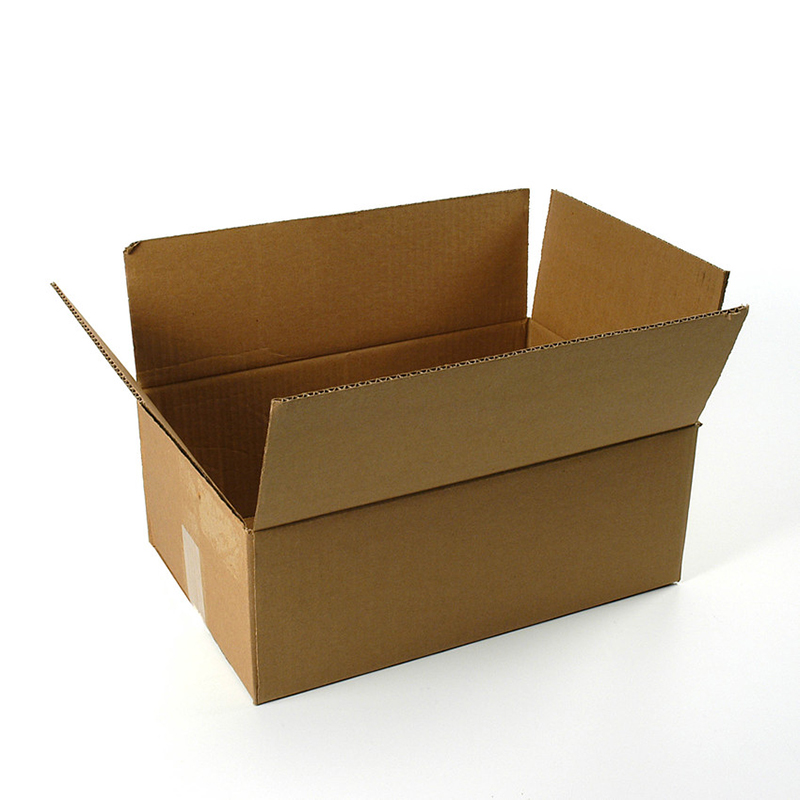

In [154]:
# Predicting with new image :
pred_img = Image.open("F:\\KAGGLE\\CNN WASTE CLASSIFICATION\\prediction\\pic7.jpg")
pred_img = pred_img.resize((64,64))
pred_img = np.array(pred_img)
pred_img = np.expand_dims(pred_img,axis=0)
result = model.predict(pred_img)
print(result)
Image.open("F:\\KAGGLE\\CNN WASTE CLASSIFICATION\\prediction\\pic7.jpg")  # Remember to change file here also

In [155]:
# Finding the class :
predicted_class_index = np.argmax(result)
class_labels = ['class1', 'class2', 'class3', 'class4', 'class5', 'class6',
                'class7', 'class8', 'class9']  # Replace with your actual class labels
predicted_class_label = class_labels[predicted_class_index]
print("Predicted Class:", predicted_class_label)


# Assuming predicted_class_label is the string obtained from the model prediction

if predicted_class_label == "class1":
    print("=========== Picture Contains Cardboard ==============")
elif predicted_class_label == "class2":
    print("=========== Picture Contains Food Organics ==============")
elif predicted_class_label == "class3":
    print("=========== Picture Contains Glass ==============")
elif predicted_class_label == "class4":
    print("=========== Picture Contains Metal ==============")
elif predicted_class_label == "class5":
    print("=========== Picture Contains Miscellaneous Trash ==============")
elif predicted_class_label == "class6":
    print("=========== Picture Contains Paper ==============")
elif predicted_class_label == "class7":
    print("=========== Picture Contains Plastic ==============")
elif predicted_class_label == "class8":
    print("=========== Picture Contains Textile Trash ==============")
elif predicted_class_label == "class9":
    print("=========== Picture Contains Vegetation ==============")


Predicted Class: class1
=========== Picture Contains Cardboard ==============


**Conclusion:**

The Garbage Classification project, trained on a diverse dataset of 4000 images, successfully achieves a remarkable accuracy of 92%. It proficiently categorizes waste into various classes, including Cardboard, Food Organics, Glass, Metal, Miscellaneous Trash, Paper, Plastic, Textile Trash, and Vegetation. This system serves as a robust solution for efficient and automated waste management.

---

**Uses in Real World:**

1. **Environment Preservation:** Automated garbage classification helps streamline waste disposal processes, contributing to environmental conservation and reduced pollution.

2. **Resource Optimization:** Efficient waste sorting enhances the recycling process, optimizing the utilization of valuable resources and minimizing environmental impact.

3. **Smart City Initiatives:** Integration of the system supports the development of smart cities by incorporating advanced technologies for sustainable waste management.

4. **Educational Tool:** The project serves as an educational resource, raising awareness about waste classification and promoting eco-friendly practices.

5. **Municipal Planning:** Municipalities can utilize the system's insights for informed planning and resource allocation in waste management strategies.

The Garbage Classification project showcases the potential of artificial intelligence to address real-world challenges, promoting a cleaner and more sustainable urban environment.